In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import torch
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
open_path = '/content/drive/MyDrive/FYP/Stock Market Group/Final Codes/DataSets/TSLA_v1_data_with_indicators.csv'
write_path = '/content/drive/MyDrive/FYP/Stock Market Group/Final Codes/Labeling/TSLA_top_points.csv'

In [4]:
def top_point_marker(closed_prices, datetime, smoothing=0.15, window_size=13):
  # mark the top points when closed prices are passed on to the function
  def create_subarrays(large_array, size):
    subarrays = []
    array_length = len(large_array)

    for i in range(array_length - size + 1):
        subarray = large_array[i:i+size]
        subarrays.append(subarray)

    return subarrays

  def top_point_identification_method(values):
    top_points = []
    for value in values:
        half_data_points = len(value) // 2
        mid_point = value.iloc[len(value) // 2] - smoothing # mid element
        mid_indx = len(value) // 2
        avg_of_first = sum(value[:mid_indx]) / half_data_points
        avg_of_second = sum(value[mid_indx+1:]) / half_data_points
        if np.logical_and(avg_of_first < mid_point, avg_of_second < mid_point):
            top_points.append(1)
        else:
            top_points.append(0)
    for i in range(len(values[0])//2): # half size of the chunk size
      top_points.insert(0,0)
      top_points.append(0)
    count=0
    for v in top_points:
      if(v == 1):
        count+=1
    print('all points:', len(top_points))
    print('top points: ', count)
    return top_points
  sub_arrays = create_subarrays(closed_prices, window_size)
  top_points = top_point_identification_method(sub_arrays)

  data = {'Datetime':datetime,'close_prices': closed_prices, 'Target_Value': top_points }
  new_df = pd.DataFrame(data)

  df_plot = new_df
  # Extract indices where 'Target_Value' is 1
  indices_of_ones = df_plot.index[df_plot['Target_Value'] == 1].tolist()

  plt.figure(figsize=(15, 6))
  # Plot Close_Price
  plt.plot(df_plot['close_prices'], label='Close Price', linestyle='-', c='grey')

  # Mark points where 'Target_Value' is 1 with a different color
  plt.scatter(indices_of_ones, df_plot.loc[indices_of_ones, 'close_prices'], c='red', label='Target = 1', marker='v', s=30)

  # Add labels and legend
  plt.xlabel('Index')
  plt.ylabel('Close Price')
  plt.title('Close Price with Target Marked')
  plt.legend()

  # Show the plot
  plt.show()
  return new_df

In [5]:
df = pd.read_csv(open_path).dropna()


In [6]:
df

,Datetime,Open,High,Low,Volume,Close,pct_change,log_change,SMA_3,SMA_12,...,enc1,enc2,enc3,enc4,enc5,enc6,enc7,enc8,enc9,enc10
0,2023-11-16 13:55:00-05:00,232.335007,232.369995,231.419998,1557072,231.869400,-0.002004,-0.002006,231.954768,233.660642,...,-1.105443,-0.440225,0.252141,-1.583965,0.768014,-1.000168,0.395395,1.201034,-0.890245,0.629940
1,2023-11-16 14:00:00-05:00,231.850006,232.130005,231.350006,1562653,231.899994,0.000132,0.000132,232.034800,233.348975,...,-0.178304,0.177245,0.040632,-1.992942,-1.018343,-0.542741,-0.220993,0.603309,0.648023,1.529872
2,2023-11-16 14:05:00-05:00,231.880005,231.880005,230.960007,1753882,231.309998,-0.002544,-0.002547,231.693130,233.036475,...,-0.053934,-0.186519,0.929528,-0.968250,-0.778455,-0.007257,0.620928,0.200086,-0.195916,1.129994
3,2023-11-16 14:10:00-05:00,231.279999,232.350006,231.130005,1767045,232.100006,0.003415,0.003410,231.769999,232.818142,...,0.487145,-0.976573,0.046202,-0.311699,1.427251,-1.647491,1.160876,1.067555,0.495829,0.358318
4,2023-11-16 14:15:00-05:00,232.115005,232.809998,231.940002,1445655,232.809906,0.003059,0.003054,232.073303,232.653550,...,-0.719340,-0.958694,-0.635123,0.665657,0.307280,-1.329517,-0.781411,0.082989,0.298596,0.593229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,2024-04-15 11:05:00-04:00,165.333801,165.369995,164.399994,1938719,165.289597,-0.000184,-0.000184,165.352503,165.547434,...,0.315320,-0.911452,1.413353,-0.643436,0.974224,1.290009,0.822492,0.792392,-1.530772,-0.371113
7800,2024-04-15 11:10:00-04:00,165.274994,165.649994,165.240005,956720,165.440002,0.000910,0.000910,165.349869,165.562435,...,-2.009832,0.276692,0.876372,-1.148734,-0.596503,0.939296,1.675214,1.471173,-0.029218,-0.605686
7801,2024-04-15 11:15:00-04:00,165.419998,165.710007,165.300003,716428,165.679993,0.001451,0.001450,165.469864,165.589926,...,1.399453,0.248646,-0.812098,-1.966704,-0.173789,-0.785599,-1.042730,-1.711250,0.204452,0.143805
7802,2024-04-15 11:20:00-04:00,165.679993,165.899994,165.440002,685126,165.809998,0.000785,0.000784,165.643331,165.606051,...,1.769437,-0.356692,0.434158,0.898952,-0.148965,0.348725,-0.519385,0.079147,0.808717,1.005020


In [7]:
# change accordingly
closed_prices = df.iloc[:, 5]
datetime = df.iloc[:,0]

In [8]:
closed_prices, datetime

(0       231.869400
 1       231.899994
 2       231.309998
 3       232.100006
 4       232.809906
            ...    
 7799    165.289597
 7800    165.440002
 7801    165.679993
 7802    165.809998
 7803    165.794998
 Name: Close, Length: 7804, dtype: float64,
 0       2023-11-16 13:55:00-05:00
 1       2023-11-16 14:00:00-05:00
 2       2023-11-16 14:05:00-05:00
 3       2023-11-16 14:10:00-05:00
 4       2023-11-16 14:15:00-05:00
                   ...            
 7799    2024-04-15 11:05:00-04:00
 7800    2024-04-15 11:10:00-04:00
 7801    2024-04-15 11:15:00-04:00
 7802    2024-04-15 11:20:00-04:00
 7803    2024-04-15 11:25:00-04:00
 Name: Datetime, Length: 7804, dtype: object)

all points: 7804
top points:  931


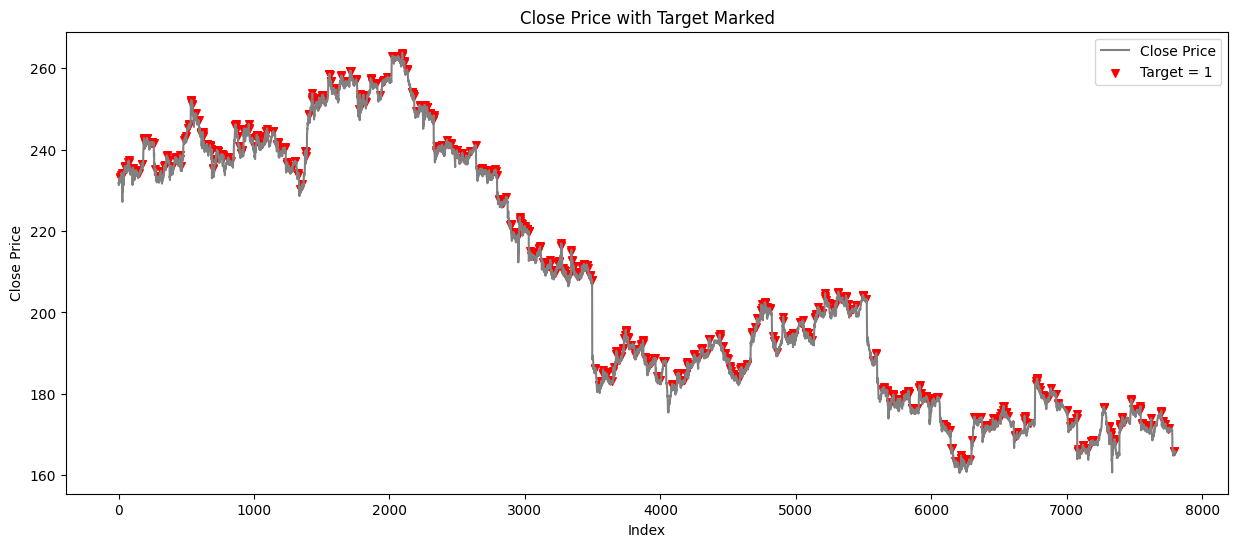

In [19]:
df_top_points_marked = top_point_marker(closed_prices, datetime, 0.25, 13)

In [20]:
df_top_points_marked.head()

,Datetime,close_prices,Target_Value
0,2023-11-16 13:55:00-05:00,231.869400,0
1,2023-11-16 14:00:00-05:00,231.899994,0
2,2023-11-16 14:05:00-05:00,231.309998,0
3,2023-11-16 14:10:00-05:00,232.100006,0
4,2023-11-16 14:15:00-05:00,232.809906,0


In [21]:
df_top_points_marked.to_csv(write_path, index=False)